## Logistic regression

In the first part of this exercise, we'll build a logistic regression model to predict whether a patient will going to get a cardiac arrest.  Suppose that you are a cardiologist and you want to determine each patient's chance of getting a heart attack based on the body measurments. You have historical data from previous patients that you can use as a training set for logistic regression.  To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores.

Let's start by examining the data.

In [2]:
#!/usr/bin/env python3

##########################################################
# Copyright (c) Jesper Vang <jesper_vang@me.com>         #
# Created on 3 Aug 2021                                 #
# Version:	0.0.1                                        #
# What:  						                         #
##########################################################

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("Matplotlib Version: {}".format(matplotlib.__version__))
print("Scikit-learn Version: {}".format(sklearn.__version__))
print("Seaborn Version: {}".format(sns.__version__))
np.set_printoptions(suppress=True, linewidth=130)


%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 8)

print(f'the present working directory is: {os.getcwd()}')
DATA_PATH = os.path.join("data")
PROJECT_ROOT_DIR = "."

def load_model_data(data):
    pwd = os.getcwd() 
    filepath = os.path.join(pwd, DATA_PATH, data) 
    return pd.read_csv(filepath)     
    
data = load_model_data("heart.csv");



Pandas Version: 1.2.5
Numpy Version: 1.19.5
Matplotlib Version: 3.4.2
Scikit-learn Version: 0.24.2
Seaborn Version: 0.11.1
the present working directory is: /Users/jvang/Documents/Projects/Applied_AI_IT_Uni



## Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic
3.   .info()
4.   Column names


In [3]:
features = np.shape(data)[0]
samples = np.shape(data)[1]
print(f"Shape of Dataset: {samples} x {features}\n\t* Number of samples:\t{samples}\n\t* Number of features:\t{features}")

Shape of Dataset: 14 x 303
	* Number of samples:	14
	* Number of features:	303


In [4]:
# 1. First few rows
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# 2. Basic statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# 3. info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# 4. Column names
columns = data.columns.to_list()
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

Questions:

1. What is the dependent variable (column name)?

It is the 'target'.

2. What are the independent variables?

  The rest of the variables in the data set, 

  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

3. Should we normalize the data?

No, we don't need to normalize it.

4. What are the column data-types?

All columns are integers except for the "oldpeak", which is float. 

# Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

1.  What are the assumptions of the linear regression model?
2.  Can we accept the basic assumptions of the linear regression model?
3.  Judging by the scatter-plots, do you see any patterns in the data?
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
5.  Are there correlations among independent variables?

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
#draw_histograms(data,data.columns,6,3)

In [9]:
#sns.countplot(x='target',data=data)

In [10]:
#sns.pairplot(data=data)

First we need to create a sigmoid function.

Task:
1.  Implement the function

Make sure the function is correctly implemented.

Task:
2.  Plot the function.

<AxesSubplot:>

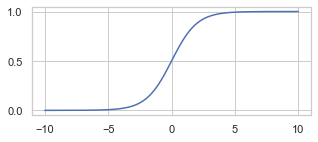

In [11]:
def sigmoid(x):
# Activation function used to map any real value between 0 and 1
    return 1/(1+ np.exp(-x))
x = np.linspace(-10,10,num = 1000)
fig = plt.figure(figsize = (5,2))
sns.set(style = 'whitegrid')
sns.lineplot(x = x, y = sigmoid(x))

Task:
1. Write the cost function to evaluate a solution.

In [12]:
def cost_func(theta,X,y):
    '''
    Calculates cost of the function.
    X & y have their usual meaning.
    theta - vector of coefficients.
    '''
    m = len(X)
    # Calculating Cost
    h = sigmoid(np.dot(X, theta))
    c = -(1.0 / m) * np.sum(y * np.log(h) + (1.0 - y) * np.log(1.0 - h)) 
    return c

Task:
1. Separate the data to `X` and `y` arrays.
2. Separate the training set and evaluation set.
3. Check the shape of our arrays to make sure everything looks good.

In [13]:
y = data["target"] # The dependent variable is selected as y
X = data.drop(["target"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f" Shape: x_train {x_train.shape} x_test: {x_test.shape}")
print(f" Shape: y_train {y_train.shape} y_test: {y_test.shape}")

 Shape: x_train (242, 13) x_test: (61, 13)
 Shape: y_train (242,) y_test: (61,)


Task:
1. Compute the cost for our initial solution (eyeball the initial value, e.g. zero).
2. Implement a function to compute the gradient (parameter updates) given our training data, labels, and model parameters.

In [14]:
# number of elements
nr_features = x_train.shape[1] # = 13
nr = X.shape[0] # = 1000
m = len(X) # = 303
# initializing the theta values like 0.0. It can be initialized as for any other value
init_theta = np.zeros(x_train.shape[1], dtype=float)  # initializing theta as zeroes

# Learning Rate
alpha = 0.00005
# Number of iterations
epochs = 200000

def initial_solutions(init_theta, x_train, y_train):
    cost_func_value = cost_func(init_theta, x_train, y_train)  # calculating the initial cost
    print(f'The initial cost is: {cost_func_value:.2f}')

initial_solutions(init_theta, x_train, y_train)
cost_func(init_theta, x_train, y_train)
#len(hypothesis(x_train,init_theta))
#len(sigmoid(np.dot(x_train, init_theta)))

The initial cost is: 0.69


0.6931471805599453

In [15]:
def gradient_descent(theta, X, y, alpha, epochs):
    m = len(X)
    J = [cost_func(X, y, theta)]
    print(J)
    for i in range(0, epochs):
        h = sigmoid(np.dot(X, theta))
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha / m) * np.sum((h - y) * X.iloc[:, i])
        J.append(cost_func(X, y, theta))
    return J, theta


gradient_descent(init_theta, x_train, y_train, alpha, epochs)


[inf]


<ipython-input-12-246461ad34b1>:10: RuntimeWarning: divide by zero encountered in log
  c = -(1.0 / m) * np.sum(y * np.log(h) + (1.0 - y) * np.log(1.0 - h))


([inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,

In [16]:
def gradient(theta, X, y):
   h = sigmoid(np.dot(X, theta))
   grad = 1.0/nr * np.dot(X.T, (h - y))
   loss = -(1.0 / nr) * np.sum(y * np.log(h) + (1.0 - y) * np.log(1.0 - h))
   return grad

gradient(init_theta, x_train, y_train)
#print(gradient)

array([-0.00074232,  0.02484009, -0.01733308, -0.00004769,  0.00000349, -0.00028342, -0.00978033, -0.00005611,  0.01727684,
        0.01456249, -0.01231522,  0.01782363,  0.02171876])

In [17]:
new_cost = 0
epochs = 200000 
i = 0

# We update the betas untill the new cost does not decrease OR we reach m iterations
while ((new_cost < cost_func) and (i < epochs)):
    init_cost = cost
    i += 1
    gd_theta = gradient(init_theta, x_train, y_train)
    updated_weights = init_theta - gd_theta * mu
    new_cost = cost_func(updated_weights, x_train, y_train)

    if i%(m/20)==0:
        print(new_cost)
    init_theta = updated_weights

TypeError: '<' not supported between instances of 'int' and 'function'

In [ ]:
def gradient_descent(init_theta, X, y, epoch, alpha):
    cost = []
    i = 0
    while i < epoch:
        hx = hypothesis(init_theta, X)
        theta[0] -= alpha * (sum(hx - y) / m)
        theta[1] -= (alpha * np.sum((hx - y) * X)) / m
        cost.append(cost_func(init_theta, X, y))
        i += 1
    if i % (m / 20) == 0:
        print(cost)
    init_theta = updated_weights
    return theta, cost


# Running Gradient Descent
gradient_descent(init_theta, x_train, y_train, epoch, alpha)

Task:
1. Calculate the cost for the optimized parameters

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(f"Accuracy of logistic regression classifier on test set: {logreg.score(x_test, y_test):.2f}")

In [ ]:
print(logreg.coef_)
cost_function(x_train, y_train, logreg.coef_[0])

Task:
1. Write a function that will output predictions for a dataset X using our learned parameters.
2. Use this function to score and print the training accuracy of our classifier.

In [ ]:
def predict(x, Theta):
  return sigmoid(np.dot(x, Theta))

In [ ]:
# Hint: Accuracy is calculated  like: correctly classified samples / all samples
pred = np.round(predict(x_test, updated_weights))
accuracy = (y_test == pred).sum() / float(len(y_test))
print(f"The accuracy is: {accuracy}")

In [ ]:
plt.scatter(X_test.index,X_test.values,c=y_predict_test)
plt.show()